![alt text](iSalud_Covecare.png 'Logo')

Fuente: 
- https://www.kaggle.com/scratchpad/notebook4031fa4176/edit
- https://www.kaggle.com/srikarkashyap/analyzing-healthcare-data-tutorial

# Analizando datos de programas de salud (EDA)

## Introducción

NTR Vaidya Seva (o Arogya Seva) es el programa de salud insignia del gobierno de Anhra Pradesh (India), con el cual las personas de bajos ingresos de ese estado pueden obtener salud pública de forma gratuita para muchas enfermedades y dolencias importantes

## A meter código!

Comenzamos importando las librerias necesarias:
* *Pandas* para cargar datos y explorar los datos
* *Matplotlib, Seaborn* para su visualización.

In [41]:
# Importamos las librerias 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.Series.__unicode__ = pd.Series.to_string

Vamos a leer el archivo de datos usando la función *read_csv* de Pandas. *read_csv* puede leer de manera sencilla archivos de valores separados por comas (csv).

No existen restricciones para nombrar las variables. *df*, *data* son los términos genéricos más comunes. Arrancamos con *data*.

In [42]:
# Leemos el dataset
data = pd.read_csv('data/ntrarogyaseva.csv')

Explotamos los datos con la función *head()* que por defecto, muestra los primeros 5 datos.

In [43]:
# Mostramos top5 de datos
data.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D


Ahora vamos a mostrar algunas estadisticas simples de las columnas numéricas del dataset. Utilizamos la función *describe* de los datos para obtenerlas..

In [44]:
# Estadísticas descriptivas
# data.describe(include='all') # Incluye todas las variables
data.describe()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479688.000000,479688.000000,479688.000000,479688.000000
mean,239844.500000,44.912264,30428.941698,27652.205861
std,138474.142301,18.961084,27441.592281,25951.706037
min,1.000000,0.000000,5.000000,2.000000
25%,119922.750000,34.000000,12500.000000,12500.000000
50%,239844.500000,47.000000,25000.000000,23200.000000
75%,359766.250000,59.000000,35000.000000,30600.000000
max,479688.000000,107.000000,520000.000000,520000.000000


Ahora analizamos los nombres de las columnas

In [45]:
# Muestra los nombres de las columnas en el dataset _data_
data.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0                     479688 non-null  int64 
 1   AGE               479688 non-null  int64 
 2   SEX               479688 non-null  object
 3   CASTE_NAME        479688 non-null  object
 4   CATEGORY_CODE     479688 non-null  object
 5   CATEGORY_NAME     479688 non-null  object
 6   SURGERY_CODE      479688 non-null  object
 7   SURGERY           479688 non-null  object
 8   VILLAGE           479688 non-null  object
 9   MANDAL_NAME       479688 non-null  object
 10  DISTRICT_NAME     479688 non-null  object
 11  PREAUTH_DATE      479688 non-null  object
 12  PREAUTH_AMT       479688 non-null  int64 
 13  CLAIM_DATE        479688 non-null  object
 14  CLAIM_AMOUNT      479688 non-null  int64 
 15  HOSP_NAME         479688 non-null  object
 16  HOSP_TYPE         479688 non-null  obj

### Tamaño del dataframe

In [47]:
data.shape

(479688, 24)

### Corrección de formatos 

Las columnas PREAUTH_DATE, CLAIM_DATE, SURGERY_DATE, DISCHARGE_DATE y MORTALITY_DATE son cargadas como si fueran del tipo Object, cuando en realidad deberían ser levantadas como fechas

In [48]:
# data = pd.read_csv("input/ntrarogyaseva.csv")
from datetime import datetime

In [50]:
# Convertimos el campo DISCHARGE_DATE a fecha. Tira un error
data['DISCHARGE_DATE'] = pd.to_datetime(data['DISCHARGE_DATE'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 116-04-30 00:00:00

In [ ]:
# Buscamos el error:
# Alternativa I:
data.loc[data['DISCHARGE_DATE'].str.contains('116', na=False)]

In [ ]:
# Alternativa II
data.loc[data['DISCHARGE_DATE']=='30/04/0116 00:00:00']

In [ ]:
# Reemplazamos los datos erroneos:
# Alternativa I
mappings = {'30/04/0116 00:00:00':'30/04/2016 00:00:00'}
data['DISCHARGE_DATE'] = data['DISCHARGE_DATE'].replace(mappings)

# Alternativa II
data.loc[data['DISCHARGE_DATE']=='30/04/0116 00:00:00', 'DISCHARGE_DATE'] = '30/04/2016 00:00:00'

In [ ]:
# Convertimos el campo DISCHARGE_DATE a fecha nuevamente
data['DISCHARGE_DATE'] = pd.to_datetime(data['DISCHARGE_DATE'])

In [ ]:
data['PREAUTH_DATE'] = pd.to_datetime(data['PREAUTH_DATE'])
data['CLAIM_DATE'] = pd.to_datetime(data['CLAIM_DATE'])
data['MORTALITY_DATE'] = pd.to_datetime(data['MORTALITY_DATE'])
data['SURGERY_DATE'] = pd.to_datetime(data['SURGERY_DATE'])

In [ ]:
# Borramos la columna que tiene el índice del CSV 
data = data.drop('   ', axis = 1)

In [ ]:
data.to_csv('data/ntrarogyaseva_cut.csv', index = False)

### NAN Values 

In [ ]:
data.isnull().sum()

In [ ]:
# DISCHARGE_DATE tiene NAs porque pueden referirse a los pacientes que siguen internados o no tienen el alta
data.loc[data['DISCHARGE_DATE'].isna()]

In [ ]:
# Podemos chequear si hay pacientes con DISCHARGE_DATE NA y que hallan fallecido
data.loc[(data['Mortality Y / N']=='YES') & (data['DISCHARGE_DATE'].isna())]

In [ ]:
# Los MORTALITY_DATE en blanco, es porque no falleció o por error en la base
data.loc[(data['Mortality Y / N']=='NO') & (data['MORTALITY_DATE'].isna())]

## Analizando un poco mas profundo...

### Cual es la distribución de la variable SEX?

*value_counts()* es una función de Pandas que puede ser usada para obtener la distribución de los datos, en la columna que se especifique.

In [ ]:
# Cantidad de cada valor en la columna SEX
data['SEX'].value_counts()

*CUIDADO*: Existe valores que están ingresados de forma diferente, que refieren al mismo valor. *Male* and *MALE* no representan valores diferentes! 

Es posible hacer un *replace* de los valores mal ingresados para normalizar la variable.
(Ademas de reemplazar Male (Child) -> Boy and Female (Child) -> Girl por conveniencia)

In [ ]:
# Mapeamos para normalizar
mappings = {'MALE' : 'Male', 'FEMALE' : 'Female', 'Male(Child)' : 'Boy', 'Female(Child)' : 'Girl'}

In [ ]:
# Reemplazamos los valores utilizando el mapping arriba definido
data['SEX'] = data['SEX'].replace(mappings)
data['SEX'].value_counts()

La visualización de esta información se puede hacer de manera sencilla utilizando la función gráfica que incluye Pandas.

In [ ]:
# Value count de Sex de forma gráfica
data['SEX'].value_counts().plot.bar()

### Cual es la distribución de la variable AGE?

Media, mediana y moda:

In [ ]:
# print the mean, median and mode of the age distribution
print("Mean: {}".format(data['AGE'].mean()))
print("Median: {}".format(data['AGE'].median()))
print("Mode: {}".format(data['AGE'].mode()))

Top 10 de las edades mas repetidas.

In [51]:
# top 10 age
data['AGE'].value_counts().head(10)

0     17513
50    16191
55    15184
45    15052
60    13732
46    12858
56    12590
51    12470
40    11962
65    11878
Name: AGE, dtype: int64

<AxesSubplot:>

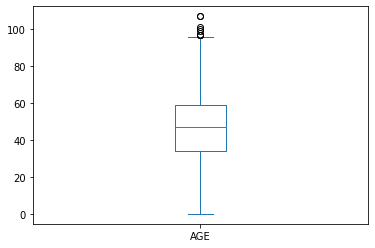

In [52]:
# boxplot para AGE
data['AGE'].plot.box()

En el grafico de arriba, la caja representa el **[Rango Intercuatilico (IQR, en inglés)](https://es.wikipedia.org/wiki/Rango_intercuart%C3%ADlico)** de los datos. 


El IQR representa la región donde cae el 50% de los datos. Por ejemplo del 25% al 75% del dataframe.
Todo dato que cae fuera de 1.5 veces el IQR es considerado, en general, una anomalía (OJO, NO SIEMPRE, DEPENDE DEL CONOCIMIENTO DE LOS DATOS POR PARTE DEL ANALISTA)

Los círculos se considerarían _outliers_

La librería _Seaborn_ ofrece visualizaciones mejores, de forma sencilla.


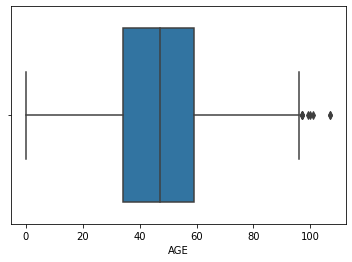

In [53]:
# sns.boxplot(data['AGE']) # Devuelve un warning, que se solucina definiendo x e y.
sns.boxplot(x=data['AGE']); # El ; evita la impresión de texto previo al gráfico.

### Preguntando y respondiendo con los datos

Una vez que hayamos realizado una pequeña exploración en los datos, ahora avancemos a realizarnos algunas preguntas para entender mejor el dataframe.

**Qué debería hacer si sólo quiero analizar los registros que pertenecen al distrito de Krishna?**

Deberí selecciononar un subconjunto de datos pertenencientes a Krishna. Pandas lo hace en dos sencillos pasos:

    1. Condición que se debe satisfacer: data['DISTRICT_NAME']=='Krishna'
    2. Insertamos la condición en el dataframe: [data['DISTRICT_NAME']=='Krishna']
      

In [54]:
# subset de datos que pertenecen al distrito de Krishna
data[data['DISTRICT_NAME']=='Krishna'].head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
30,31,42,Female,OC,S12,MEDICAL ONCOLOGY,S12.26.1,Chemotherapy for Acute Myeloid Leukemia with I...,Ward-1,Vijayawada,...,60000,Nims Hospitals,G,HYDERABAD,Hyderabad,06/08/2014 00:00:00,01/09/2014 00:00:00,NO,NaN,D
56,57,52,Male,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ward-26,Vijayawada,...,25000,OZONE HOSPITALS,C,HYDERABAD,Ranga Reddy,28/10/2014 00:00:00,06/11/2014 00:00:00,NO,NaN,D
58,59,17,Female,SC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.10.1,Mitral Valve Replacement (With Valve),Atapaka,Kaikalur,...,135000,Karumuri Hospital,C,GUNTUR,Guntur,04/11/2014 00:00:00,12/11/2014 00:00:00,NO,NaN,D
97,98,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,...,10000,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,08/04/2015 00:00:00,NaN,YES,03/05/2015 00:00:00,P
111,112,65,Male,OC,M7,NEUROLOGY,M7.4,Medical Management of Ischemic Strokes,Chilakalapudi (R),Machilipatnam,...,10000,Rims General Hospital,G,KADAPA,YSR Kadapa,28/05/2015 00:00:00,01/06/2015 00:00:00,NO,NaN,D


**Enfermedad/intervención con mayor prevalencia, por distrito**

Se puede obtener iterando a través de todos los distritos, y seleccionando el subset de datos para cada uno de ellos.


In [55]:
# Iteración
for i in data['DISTRICT_NAME'].unique():
    print("Distrito: {}\nEnfermedad/intervención y Count: {}".format(i,data[data['DISTRICT_NAME']==i]['SURGERY'].value_counts().head(1)))

Distrito: Srikakulam
Enfermedad/intervención y Count: Maintenance Hemodialysis For Crf    3970
Name: SURGERY, dtype: int64
Distrito: Kurnool
Enfermedad/intervención y Count: Surgical Correction Of Longbone Fracture    2943
Name: SURGERY, dtype: int64
Distrito: Vizianagaram
Enfermedad/intervención y Count: Surgical Correction Of Longbone Fracture    2754
Name: SURGERY, dtype: int64
Distrito: Guntur
Enfermedad/intervención y Count: Surgical Correction Of Longbone Fracture    5259
Name: SURGERY, dtype: int64
Distrito: Vishakhapatnam
Enfermedad/intervención y Count: Maintenance Hemodialysis For Crf    5270
Name: SURGERY, dtype: int64
Distrito: West Godavari
Enfermedad/intervención y Count: Maintenance Hemodialysis For Crf    5478
Name: SURGERY, dtype: int64
Distrito: Krishna
Enfermedad/intervención y Count: Maintenance Hemodialysis For Crf    6026
Name: SURGERY, dtype: int64
Distrito: East Godavari
Enfermedad/intervención y Count: Surgical Correction Of Longbone Fracture    6998
Name: SURG

**Promedio de claim amount, por distrito**

In [56]:
# Average claim amount for surgery by district
for i in data['DISTRICT_NAME'].unique():
    print("Distrito: {}\nMedia Claim Amount: ₹{}".format(i,data[data['DISTRICT_NAME']==i]['CLAIM_AMOUNT'].mean()))

Distrito: Srikakulam
Media Claim Amount: ₹25593.712618634367
Distrito: Kurnool
Media Claim Amount: ₹28598.91853309593
Distrito: Vizianagaram
Media Claim Amount: ₹25097.78006899492
Distrito: Guntur
Media Claim Amount: ₹31048.73950729927
Distrito: Vishakhapatnam
Media Claim Amount: ₹25977.94638304871
Distrito: West Godavari
Media Claim Amount: ₹27936.70608610806
Distrito: Krishna
Media Claim Amount: ₹31015.383233247547
Distrito: East Godavari
Media Claim Amount: ₹26166.136719737173
Distrito: Prakasam
Media Claim Amount: ₹28655.81036215859
Distrito: Nellore
Media Claim Amount: ₹26105.122376744654
Distrito: YSR Kadapa
Media Claim Amount: ₹27945.216899192998
Distrito: Chittoor
Media Claim Amount: ₹25708.102690948628
Distrito: Anantapur
Media Claim Amount: ₹27664.166978581827


El desvio estandar no parece ser demasiado alto. El distrito de Guntur es el de valor mas alto con ₹31048 mientras  Vizianagaram ocupa el último lugar con ₹25097

**Estadísticas por categoria de operación**

Vamos a utilizar el _groupby_ de Pandas para construir estadísticas, agrupando los datos por la categoría de operación. El _groupby_ trabaja de forma similar al comando de _SQL_ del mismo nombre

In [57]:
# group by surgery para obtener estadísticas
data.groupby('CATEGORY_NAME').mean()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
CATEGORY_NAME,,,,
CARDIAC AND CARDIOTHORACIC SURGERY,220433.263365,51.764553,87052.165471,82487.123074
CARDIOLOGY,222494.427828,54.652048,33215.140211,26731.893660
COCHLEAR IMPLANT SURGERY,64429.337838,1.581081,520000.000000,516486.486486
CRITICAL CARE,225189.278328,51.014649,69927.226196,50185.150797
DERMATOLOGY,145752.231707,46.573171,28003.012195,21728.353659
ENDOCRINOLOGY,173188.782353,45.066667,18981.376471,14875.437255
ENT SURGERY,248911.441121,32.521940,15691.907198,14938.095612
GASTROENTEROLOGY,169310.423028,41.662383,37085.464601,23798.118922
GENERAL MEDICINE,116546.798682,35.330161,30347.573939,21840.991215


Cochlear Implant Surgery es el que tiene la operación mas costosa. (₹520000 en promedio). Las Protesis (Prostheses) cuestan ₹1200 (las mas baratas). A su vez, el grupo mas joven también para ser el que demanada la Cochlear Implant Surgery: 1.58 años, mientras que Neurology  tiene pacientes de, en promedio, ~56.

**Operación mas común por grupo de edad**

Para encontrar la operación mas común por grupo de edad, vamos a redondear las edades al valor múltiplo de 10 mas cercano.

Hacemos una copia del dataframe para no _ensuciar_ el dataframe original.

In [58]:
dataround = data.copy()

Utilizamos la función _round_ de Pandas para redonder el valor de la edad. *-1* indica que redondeamos hasta1 dígito a la izquierda del valor decimal.

In [59]:
# round a la edad en 0 o 1
dataround['AGE'] = dataround['AGE'].round(-1)

Visualizamos los grupos de edad utilizando la función _Seaborn countplot_ 

<AxesSubplot:xlabel='AGE', ylabel='count'>

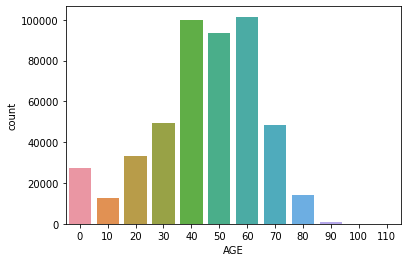

In [60]:
# frequency plot
sns.countplot(x=dataround['AGE'])

**Operaciones mas comunes por grupo de edad**

In [61]:
for i in sorted(dataround['AGE'].unique()):
    print("Age Group: {}\nMost Common Surgery and Count: {}".format(i,data[data['AGE']==i]['CATEGORY_NAME'].value_counts().head(1)))

Age Group: 0
Most Common Surgery and Count: PEDIATRICS    15096
Name: CATEGORY_NAME, dtype: int64
Age Group: 10
Most Common Surgery and Count: POLY TRAUMA    390
Name: CATEGORY_NAME, dtype: int64
Age Group: 20
Most Common Surgery and Count: POLY TRAUMA    729
Name: CATEGORY_NAME, dtype: int64
Age Group: 30
Most Common Surgery and Count: POLY TRAUMA    1125
Name: CATEGORY_NAME, dtype: int64
Age Group: 40
Most Common Surgery and Count: MEDICAL ONCOLOGY    2425
Name: CATEGORY_NAME, dtype: int64
Age Group: 50
Most Common Surgery and Count: MEDICAL ONCOLOGY    3171
Name: CATEGORY_NAME, dtype: int64
Age Group: 60
Most Common Surgery and Count: MEDICAL ONCOLOGY    2447
Name: CATEGORY_NAME, dtype: int64
Age Group: 70
Most Common Surgery and Count: POLY TRAUMA    1845
Name: CATEGORY_NAME, dtype: int64
Age Group: 80
Most Common Surgery and Count: POLY TRAUMA    584
Name: CATEGORY_NAME, dtype: int64
Age Group: 90
Most Common Surgery and Count: POLY TRAUMA    67
Name: CATEGORY_NAME, dtype: int64
A

### Anomalías
Fuente: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

In [62]:
# Leemos el dataset
# data = pd.read_csv('data/ntrarogyaseva_cut.csv')

<AxesSubplot:xlabel='AGE', ylabel='CLAIM_AMOUNT'>

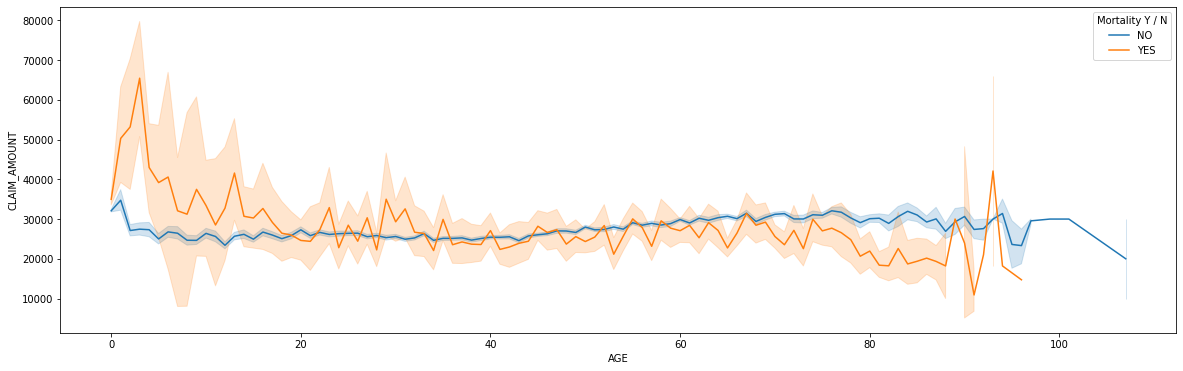

In [63]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=data, x="AGE", y="CLAIM_AMOUNT", ci=95, hue="Mortality Y / N")

In [74]:
# Reducimos el DF para trabajar con mayor velocidad
data_graph = data.loc[data['SURGERY_DATE']>'31/06/2016 00:00:00']
data_graph = data_graph.copy()
data_graph.shape

(5592, 24)

In [75]:
data_graph.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

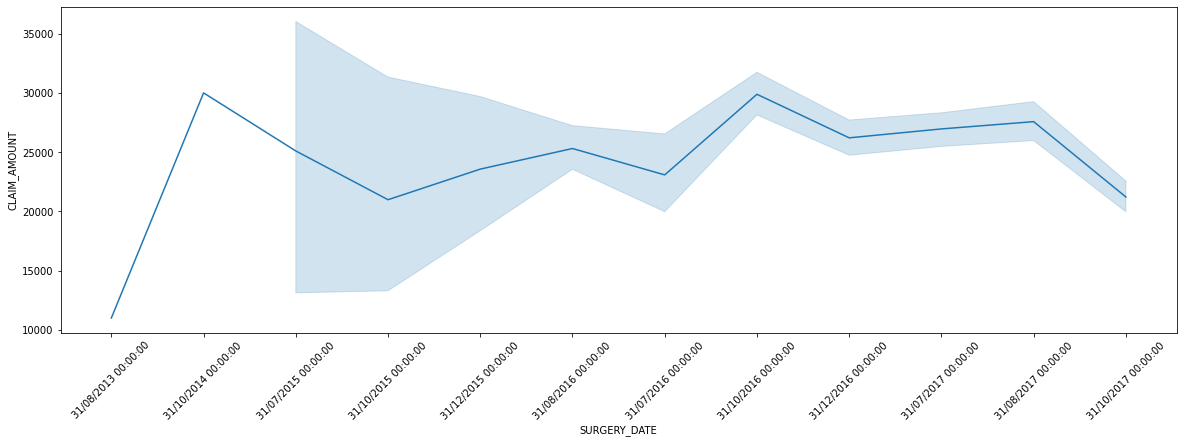

In [76]:
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=data_graph, x="SURGERY_DATE", y="CLAIM_AMOUNT")
plt.xticks(rotation=45); # el ; oculta el texto previo al gráfico. El mismo resultado se logra con plt.show()

In [77]:
data_graph.sort_values(by='SURGERY_DATE', ascending=False)
data_graph['CLAIM_AMOUNT_min'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() - 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
data_graph['CLAIM_AMOUNT_max'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean() + 3*data_graph['CLAIM_AMOUNT'].rolling(5).std()
data_graph['CLAIM_AMOUNT_RM'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean()

data_graph['CLAIM_AMOUNT_min'] = data_graph['CLAIM_AMOUNT'] - 3*data_graph['CLAIM_AMOUNT']
data_graph['CLAIM_AMOUNT_max'] = data_graph['CLAIM_AMOUNT'] + 3*data_graph['CLAIM_AMOUNT']
# data_graph['CLAIM_AMOUNT_RM'] = data_graph['CLAIM_AMOUNT'].rolling(5).mean()

In [80]:
data_graph.tail()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION,CLAIM_AMOUNT_min,CLAIM_AMOUNT_max,CLAIM_AMOUNT_RM
476785,476786,69,Female,BC,S3,OPHTHALMOLOGY SURGERY,S3.3.1,Vitrectomy,Nallajerla,Nallajerla,...,TADEPALLI GUDEM,West Godavari,31/10/2017 00:00:00,02/11/2017 00:00:00,NO,NaN,D,-46040,92080,24224.0
476813,476814,66,Male,SC,S5,ORTHOPEDIC SURGERY AND PROCEDURES,S5.1.4,Reduction Of Compound Fractures and External F...,Peramana,Sangam,...,NELLORE,Nellore,31/10/2017 00:00:00,03/11/2017 00:00:00,NO,NaN,D,-50000,100000,26724.0
476881,476882,36,Male,OC,S10,NEUROSURGERY,S10.1.26,Excision Of Brain Abcess,Narrawada,Duttalur,...,NELLORE,Nellore,31/10/2017 00:00:00,06/11/2017 00:00:00,NO,NaN,D,-140000,280000,35604.0
476901,476902,37,Male,SC,S3,OPHTHALMOLOGY SURGERY,S3.3.1,Vitrectomy,Gunnampalle,D.Tirumala,...,TADEPALLI GUDEM,West Godavari,31/10/2017 00:00:00,02/11/2017 00:00:00,NO,NaN,D,-46040,92080,34208.0
477660,477661,51,Male,BC,S1,GENERAL SURGERY,S1.3.3.10,Surgical management of Duodenal perforation,Venkata Rangaraya Puram,Regidiamadalavalasa,...,SRIKAKULAM,Srikakulam,31/10/2017 00:00:00,11/11/2017 00:00:00,NO,NaN,D,-96000,192000,37808.0


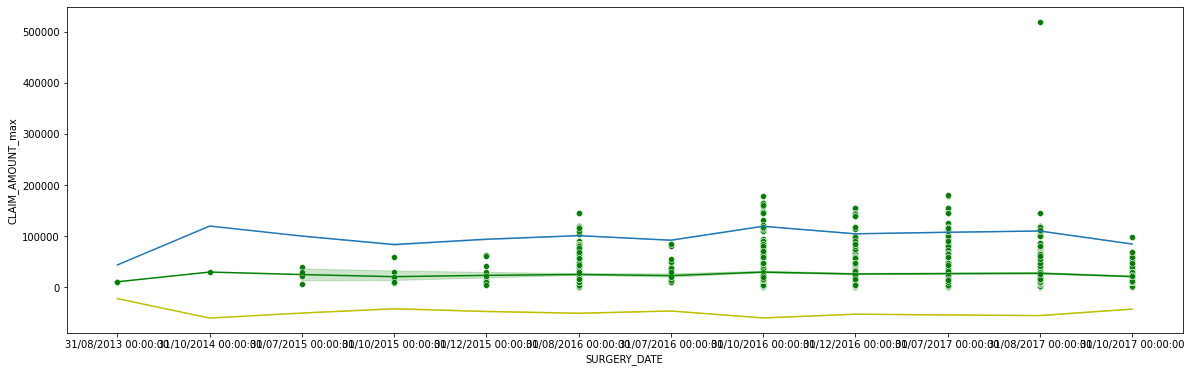

In [81]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=data_graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=data_graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g')

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g')

# ax.axes.set_title("Date and Claim Amount",fontsize=20)
# ax.set_xlabel("Date",fontsize=15)
# ax.set_ylabel("Claim Amount",fontsize=15)
# ax.tick_params(labelsize=5)
# plt.xticks(rotation=45)

plt.show()

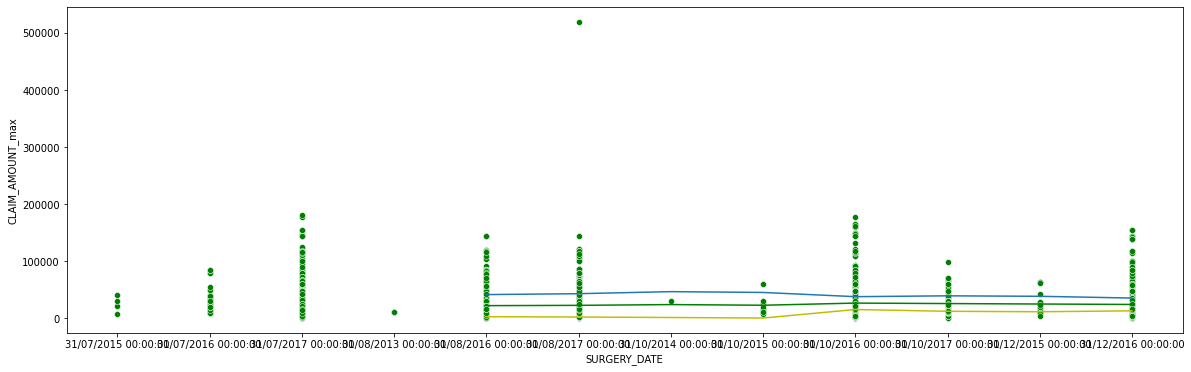

In [82]:
# Agrupamos los datos por fecha, con el promedio del CLAIM_AMOUNT
graph = data_graph.groupby(['SURGERY_DATE']).agg({'CLAIM_AMOUNT': 'mean'}).reset_index()

# Calculamos el la media movil para el CLAIM_AMOUNT y -+ 3 desvíos
graph.sort_values(by='SURGERY_DATE', ascending=False)
graph['CLAIM_AMOUNT_min'] = graph['CLAIM_AMOUNT'].rolling(5).mean() - 3*graph['CLAIM_AMOUNT'].rolling(5).std()
graph['CLAIM_AMOUNT_max'] = graph['CLAIM_AMOUNT'].rolling(5).mean() + 3*graph['CLAIM_AMOUNT'].rolling(5).std()
graph['CLAIM_AMOUNT_RM'] = graph['CLAIM_AMOUNT'].rolling(5).mean()

fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT_RM', 
             data=graph, 
             color='g')

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g');

#### Eliminar outliers

- Computamos el Z-score para la columna seleccionada, relativo a la media y al STD de esa columna
- Tomamos el valor absoluto del Z-score.

Si queremos calcular para todas las variables
- df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
  
_all(axis=1)_  garantiza qeu para cada fila, todas las columnas satisfacen la restricciónensures that for each row, all column satisfy the constraint.


In [87]:
from scipy import stats
import numpy as np
# graph_graph = data_graph.groupby(['SURGERY_DATE']).agg({'CLAIM_AMOUNT': 'mean'}).reset_index()

data_graph = data_graph[(np.abs(stats.zscore(data_graph['CLAIM_AMOUNT'])) < 3)]

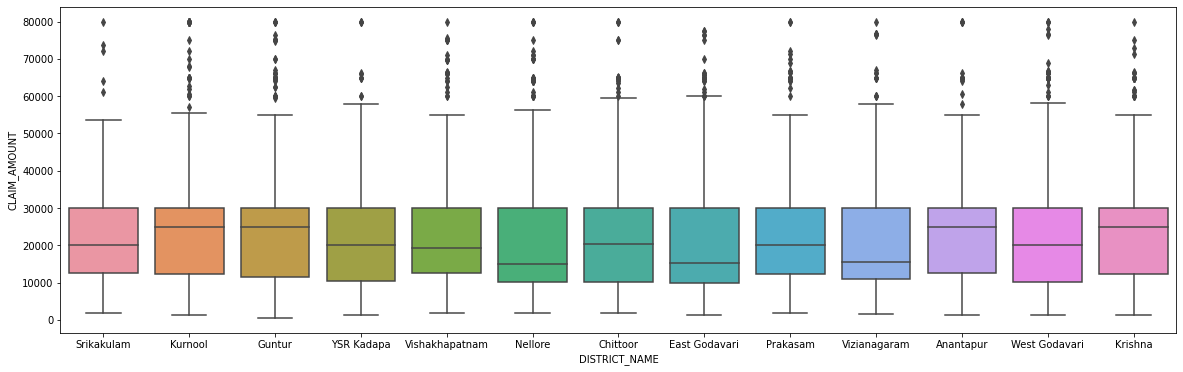

In [88]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.boxplot(x=data_graph['DISTRICT_NAME'], y=data_graph['CLAIM_AMOUNT']);

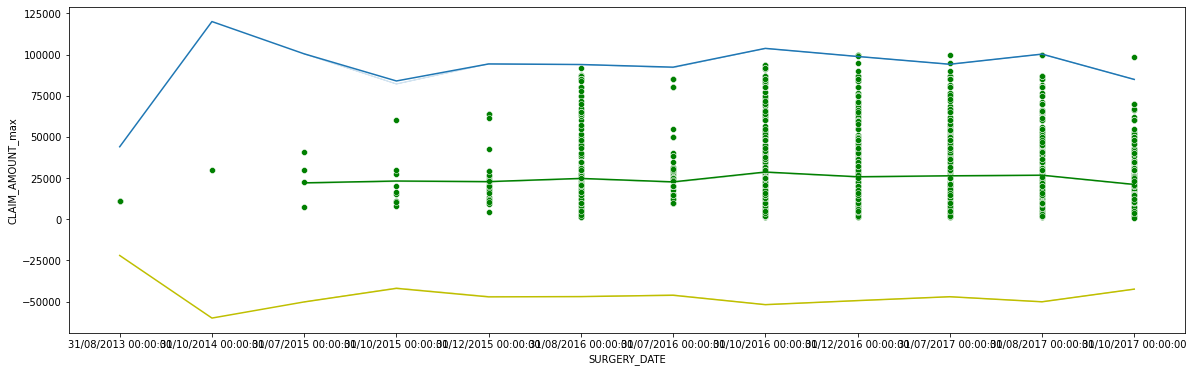

In [86]:
# Graficamos las series sin los valores que exceden el z-score
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_max',
             data=data_graph,
             ci=False)

sns.lineplot(x='SURGERY_DATE',
             y='CLAIM_AMOUNT_min',
             data=data_graph,
             color='y',
             ci=False)

sns.lineplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT_RM', 
             data=data_graph, 
             color='g',
             ci=False)

sns.scatterplot(x='SURGERY_DATE', 
             y='CLAIM_AMOUNT', 
             data=data_graph, 
             color='g');

### Exportar Notebook 
Primero, obtenemos el nombre del archivo

In [ ]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

Exportamos todo el notebook. Código y resultados

In [ ]:
!jupyter nbconvert --TagRemovePreprocessor.enabled=True --to html $nb_name 

Exportamos solo los resultados

In [ ]:
!jupyter nbconvert --TagRemovePreprocessor.enabled=True --no-input --to html $nb_name 

Exportamos solo resultados, y sólo celdas que no tengan _tag=no_

In [ ]:
!jupyter nbconvert --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='{"no"}' --no-input --to html $nb_name 